In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import chi2_contingency

# 음주운전 판결 데이터 불러오기



In [ ]:
path_to_file = "/content/drive/MyDrive/Colab Notebooks/DSL/24-1 EDA/음주운전 판결.xlsx"

In [ ]:
df = pd.read_excel(path_to_file)
df2 = df[(df['year'] >= 2014) & (df['year'] <= 2023)] #2014 - 2023
df2.head()

,year,사건번호,법원,징역,벌금,음주수준,사고여부,"사고결과 (인명 피해 없음, 중상, 사망)",전과 기록 (음주 운전),기타
61,2014,2014고단504,서울중앙지방법원,8,0,측정 거부,0.0,0.0,3,NaN
62,2014,2014고정738,울산지방법원,0,1000,0.115,1.0,1.0,2,NaN
63,2014,2014고합135,울산지방법원,18,0,0.128,1.0,1.0,알 수 없음,NaN
64,2014,2014고단8262,부산지방법원,10,0,0.11,0.0,0.0,1,NaN
65,2014,2014고단1843,울산지방법원,6,0,0.164,0.0,0.0,0,NaN


#징역/벌금 기술통계

In [ ]:
df_jail = df2[df2['징역'] != 0] #2014 - 2023 징역 선고

#df_jail.head()
#num_rows = len(df_jail)
#print("징역 선고:", num_rows, "개")

# '징역'에 대한 기술통계
statistics = df_jail['징역'].describe()
print(statistics)

count    113.000000
mean      16.690265
std       16.088527
min        4.000000
25%        8.000000
50%       12.000000
75%       18.000000
max      120.000000
Name: 징역, dtype: float64


In [ ]:
df_jail2 = df_jail[df_jail['year'] <= 2018]
#df_jail2.head()

# 2014 - 2018 '징역'에 대한 기술통계
statistics2 = df_jail2['징역'].describe()
print(statistics2)

count    58.000000
mean     14.068966
std      14.363528
min       4.000000
25%       6.000000
50%       9.000000
75%      18.000000
max      96.000000
Name: 징역, dtype: float64


In [ ]:
df_jail3 = df_jail[df_jail['year'] > 2018]
#df_jail3.head()

# 2019 - 2023 '징역'에 대한 기술통계
statistics3 = df_jail3['징역'].describe()
print(statistics3)

count     55.000000
mean      19.454545
std       17.433278
min        4.000000
25%       12.000000
50%       14.000000
75%       24.000000
max      120.000000
Name: 징역, dtype: float64


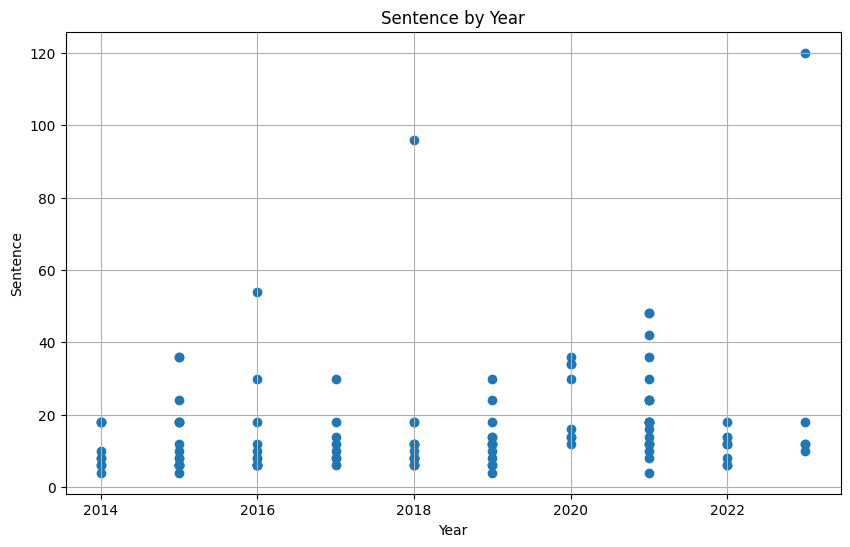

In [ ]:
#징역 plot
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
plt.scatter(df_jail['year'], df_jail['징역'], marker='o') # 선 그래프 그리기
plt.xlabel('Year') # x축 라벨 설정
plt.ylabel('Sentence') # y축 라벨 설정
plt.title('Sentence by Year') # 그래프 제목 설정
plt.grid(True) # 격자 표시
plt.show() # 그래프 표시

In [ ]:
df_money = df2[df2['징역'] == 0] #2014 - 2023 벌금 선고
#df_money.head()
#num_rows = len(df_money)
#print("벌금 선고:", num_rows, "개")

# '벌금'에 대한 기술통계
statistic = df_money['벌금'].describe()
print(statistic)

count      27.000000
mean      765.037037
std       569.410321
min         6.000000
25%       250.000000
50%       700.000000
75%      1100.000000
max      2000.000000
Name: 벌금, dtype: float64


In [ ]:
df_money2 = df_money[df_money['year'] <= 2018]
#df_money2.head()

# 2014 - 2018 '징역'에 대한 기술통계
statistic2 = df_money2['벌금'].describe()
print(statistic2)

count      12.000000
mean      500.000000
std       310.424929
min       100.000000
25%       200.000000
50%       500.000000
75%       700.000000
max      1000.000000
Name: 벌금, dtype: float64


In [ ]:
df_money3 = df_money[df_money['year'] > 2018]
#df_money3.head()

# 2019 - 2023 '징역'에 대한 기술통계
statistic3 = df_money3['벌금'].describe()
print(statistic3)

count      15.000000
mean      977.066667
std       646.564931
min         6.000000
25%       500.000000
50%       900.000000
75%      1500.000000
max      2000.000000
Name: 벌금, dtype: float64


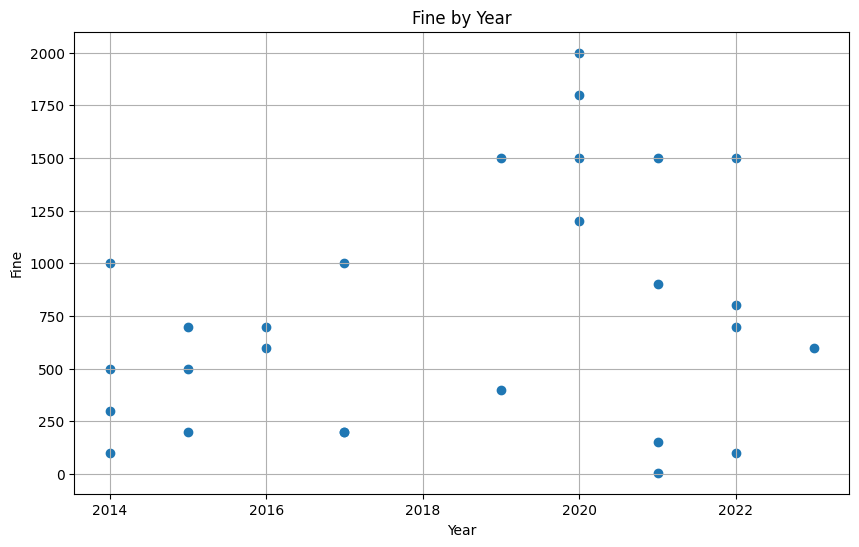

In [ ]:
#벌금 plot
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
plt.scatter(df_money['year'], df_money['벌금'], marker='o') # 선 그래프 그리기
plt.xlabel('Year') # x축 라벨 설정
plt.ylabel('Fine') # y축 라벨 설정
plt.title('Fine by Year') # 그래프 제목 설정
plt.grid(True) # 격자 표시
plt.show() # 그래프 표시

#등분산성 검정

In [ ]:
jail1 = df_jail2['징역']
jail2 = df_jail3['징역']

money1 = df_money2['벌금']
money2 = df_money3['벌금']

In [ ]:
#징역 데이터 레빈 검정 실시
stat, p = levene(jail1, jail2)

print(stat)

# p-값 출력
print('p-value:', p)

# 등분산성 가정에 대한 결론
if p > 0.05:
    print('등분산성 가정을 만족함 (분산이 동일함)')
else:
    print('등분산성 가정을 만족하지 않음 (분산이 다름)')

0.49926275798999914
p-value: 0.48130483005345115
등분산성 가정을 만족함 (분산이 동일함)


In [ ]:
#벌금 데이터 레빈 검정 실시
stat, p = levene(money1, money2)

print(stat)

# p-값 출력
print('p-value:', p)

# 등분산성 가정에 대한 결론
if p > 0.05:
    print('등분산성 가정을 만족함 (분산이 동일함)')
else:
    print('등분산성 가정을 만족하지 않음 (분산이 다름)')

8.693476618928562
p-value: 0.006831597280477523
등분산성 가정을 만족하지 않음 (분산이 다름)


#정규성 검정

In [ ]:
jail3 = df_jail['징역']

# 샤피로-윌크 검정 수행
stat, p = shapiro(jail3)

print(stat)

# p-값 출력
print('p-value:', p)

# 정규성 가정에 대한 결론
if p > 0.05:
    print('정규 분포를 따름 (정규성 가정 만족)')
else:
    print('정규 분포를 따르지 않음 (정규성 가정 불만족)')


0.6225369572639465
p-value: 1.2942173213727486e-15
정규 분포를 따르지 않음 (정규성 가정 불만족)


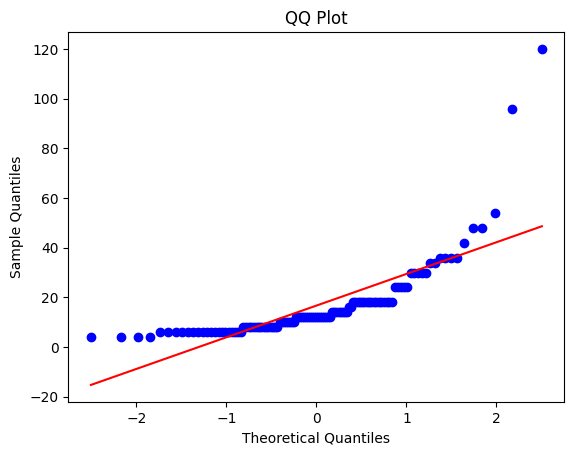

In [ ]:
# QQ Plot 생성
stats.probplot(jail3, dist="norm", plot=plt)

# QQ Plot 표시
plt.title("QQ Plot")
plt.ylabel('Sample Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.show()

In [ ]:
money3 = df_money['벌금']

# 샤피로-윌크 검정 수행
stat, p = shapiro(money3)

print(stat)

# p-값 출력
print('p-value:', p)

# 정규성 가정에 대한 결론
if p > 0.05:
    print('정규 분포를 따름 (정규성 가정 만족)')
else:
    print('정규 분포를 따르지 않음 (정규성 가정 불만족)')

0.9274466633796692
p-value: 0.05984847620129585
정규 분포를 따름 (정규성 가정 만족)


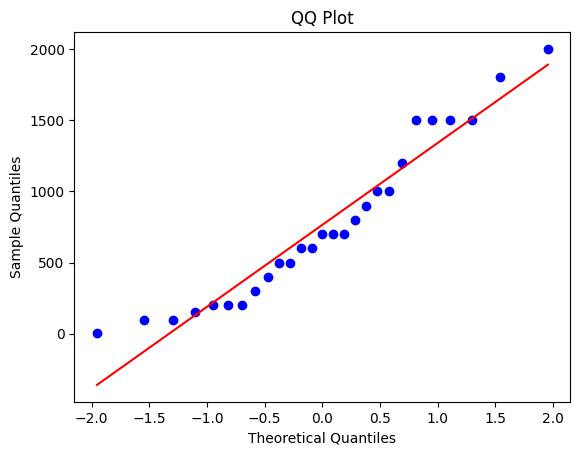

In [ ]:
# QQ Plot 생성
stats.probplot(money3, dist="norm", plot=plt)

# QQ Plot 표시
plt.title("QQ Plot")
plt.ylabel('Sample Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.show()

####징역과 벌금 모두 정규성을 만족한다고 판단하기 어려움. 따라서 t-test를 사용하는 대신 비모수 검정인 Mann-Whitney U test를 사용하여 중위값을 비교하고자 함.

#Mann-Whitney U test

####2018 윤창호법 기준 5개년 선고 형량 비교

In [ ]:
from scipy.stats import mannwhitneyu

# 맨-휘트니 U 검정 수행
stat, p = mannwhitneyu(jail1, jail2, alternative='less') # 첫 번째 그룹이 두 번째 그룹보다 작다는 것을 검정

# 결과 출력
print('Statistics=%.3f, p=%.3f' % (stat, p))

# 유의성 평가
if p > 0.05:
    print('두 그룹 간의 형량에 유의한 차이가 없음 (귀무가설을 기각하지 못함)')
else:
    print('두 그룹 간의 형량에 유의한 차이가 있음 (귀무가설을 기각함)')


Statistics=1046.000, p=0.001
두 그룹 간의 형량에 유의한 차이가 있음 (귀무가설을 기각함)


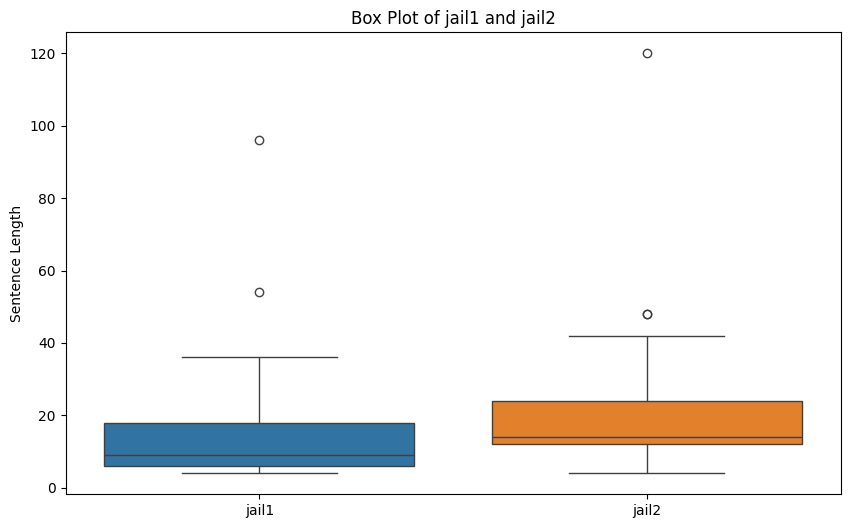

In [ ]:
# jail1과 jail2 데이터를 하나의 DataFrame으로 결합
data = pd.DataFrame({'jail1': jail1, 'jail2': jail2})

# 데이터의 박스 플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of jail1 and jail2')
plt.ylabel('Sentence Length')
plt.show()

####2018 윤창호법 기준 5개년 선고 벌금 비교

In [ ]:
from scipy.stats import mannwhitneyu

# 맨-휘트니 U 검정 수행
stat, p = mannwhitneyu(money1, money2, alternative='less') # 첫 번째 그룹이 두 번째 그룹보다 작다는 것을 검정

# 결과 출력
print('Statistics=%.3f, p=%.3f' % (stat, p))

# 유의성 평가
if p > 0.05:
    print('두 그룹 간의 형량에 유의한 차이가 없음 (귀무가설을 기각하지 못함)')
else:
    print('두 그룹 간의 형량에 유의한 차이가 있음 (귀무가설을 기각함)')

Statistics=53.000, p=0.037
두 그룹 간의 형량에 유의한 차이가 있음 (귀무가설을 기각함)


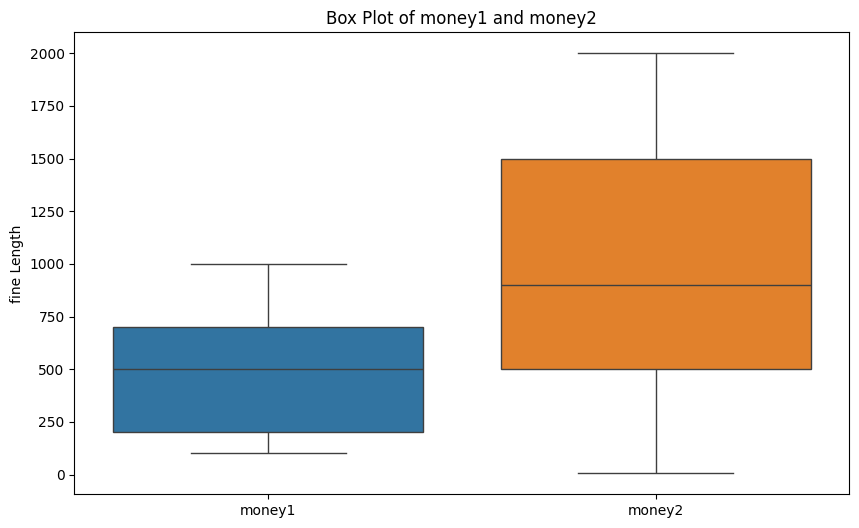

In [ ]:
# money1과 money2 데이터를 하나의 DataFrame으로 결합
data = pd.DataFrame({'money1': money1, 'money2': money2})

# 데이터의 박스 플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of money1 and money2')
plt.ylabel('fine Length')
plt.show()